In [1]:
from keras.datasets import reuters
import numpy as np
from matplotlib import pyplot as plt
from keras.layers import Dense,Activation
from keras.models import Sequential
import keras

In [2]:
(x_train,y_train),(x_test,y_test)=reuters.load_data(num_words=None,test_split=0.2)
word_index=reuters.get_word_index()

/home/daominhkhanh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:148: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_train, y_train = np.array(xs[:idx]), np.array(labels[:idx])
/home/daominhkhanh/anaconda3/lib/python3.7/site-packages/tensorflow/python/keras/datasets/reuters.py:149: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  x_test, y_test = np.array(xs[idx:]), np.array(labels[idx:])


In [3]:
print("Number of training samples: {}".format(len(x_train)))
print("Number of test samples: {}".format(len(x_test)))
num_classes=max(y_train)+1
print("Total classes: {}".format(num_classes))

Number of training samples: 8982
Number of test samples: 2246
Total classes: 46


In [4]:
import pandas as pd
info={'copper': 6, 'livestock': 28, 'gold': 25, 'money-fx': 19, 'ipi': 30, 'trade': 11, 'cocoa': 0, 'iron-steel': 31, 'reserves': 12, 'tin': 26, 'zinc': 37, 'jobs': 34, 'ship': 13, 'cotton': 14, 'alum': 23, 'strategic-metal': 27, 'lead': 45, 'housing': 7, 'meal-feed': 22, 'gnp': 21, 'sugar': 10, 'rubber': 32, 'dlr': 40, 'veg-oil': 2, 'interest': 20, 'crude': 16, 'coffee': 9, 'wheat': 5, 'carcass': 15, 'lei': 35, 'gas': 41, 'nat-gas': 17, 'oilseed': 24, 'orange': 38, 'heat': 33, 'wpi': 43, 'silver': 42, 'cpi': 18, 'earn': 3, 'bop': 36, 'money-supply': 8, 'hog': 44, 'acq': 4, 'pet-chem': 39, 'grain': 1, 'retail': 29}
data={'Topics':list(info.keys()),'Map to int':list(info.values())}
df=pd.DataFrame(data)

In [5]:
df.tail(9)

,Topics,Map to int
37,cpi,18
38,earn,3
39,bop,36
40,money-supply,8
41,hog,44
42,acq,4
43,pet-chem,39
44,grain,1
45,retail,29


In [6]:
index_to_word={}
for key,value in word_index.items():
    index_to_word[value]=key

In [7]:
print(' '.join([index_to_word[x] for x in x_train[0]])+'\n\n')
print("Topics: {}".format(np.array(df.loc[df['Map to int']==y_train[0]])[0][0]))

the wattie nondiscriminatory mln loss for plc said at only ended said commonwealth could 1 traders now april 0 a after said from 1985 and from foreign 000 april 0 prices its account year a but in this mln home an states earlier and rise and revs vs 000 its 16 vs 000 a but 3 psbr oils several and shareholders and dividend vs 000 its all 4 vs 000 1 mln agreed largely april 0 are 2 states will billion total and against 000 pct dlrs


Topics: earn


In [8]:
from keras.preprocessing.text import Tokenizer
max_words=1000
tokenizer=Tokenizer(num_words=max_words)
x_train=tokenizer.sequences_to_matrix(x_train,mode='binary')
x_test=tokenizer.sequences_to_matrix(x_test,mode='binary')
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [9]:
print(len(np.where(x_train[0]!=0)[0]))

52


In [10]:
from keras.layers import Dropout

In [11]:
model=Sequential()
model.add(Dense(512,input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 512)               512512    
_________________________________________________________________
activation (Activation)      (None, 512)               0         
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 46)                23598     
_________________________________________________________________
activation_1 (Activation)    (None, 46)                0         
Total params: 536,110
Trainable params: 536,110
Non-trainable params: 0
_________________________________________________________________


In [13]:
epochs=20
batch_size=128
history=model.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_split=0.2)

Epoch 1/20
57/57 [==============================] - 1s 13ms/step - loss: 2.3920 - accuracy: 0.4894 - val_loss: 1.2405 - val_accuracy: 0.7340
Epoch 2/20
57/57 [==============================] - 0s 8ms/step - loss: 1.1088 - accuracy: 0.7498 - val_loss: 1.0122 - val_accuracy: 0.7807
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.8187 - accuracy: 0.8141 - val_loss: 0.9142 - val_accuracy: 0.7947
Epoch 4/20
57/57 [==============================] - 0s 7ms/step - loss: 0.6127 - accuracy: 0.8601 - val_loss: 0.8591 - val_accuracy: 0.8030
Epoch 5/20
57/57 [==============================] - 0s 9ms/step - loss: 0.4976 - accuracy: 0.8861 - val_loss: 0.8321 - val_accuracy: 0.8019
Epoch 6/20
57/57 [==============================] - 0s 7ms/step - loss: 0.4204 - accuracy: 0.8997 - val_loss: 0.8172 - val_accuracy: 0.8102
Epoch 7/20
57/57 [==============================] - 0s 8ms/step - loss: 0.3594 - accuracy: 0.9213 - val_loss: 0.8290 - val_accuracy: 0.8119
Epoch 8/20
57/57 [=

In [14]:
score=model.evaluate(x_test,y_test,batch_size=batch_size,verbose=1)

18/18 [==============================] - 0s 2ms/step - loss: 1.0652 - accuracy: 0.7809


In [16]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

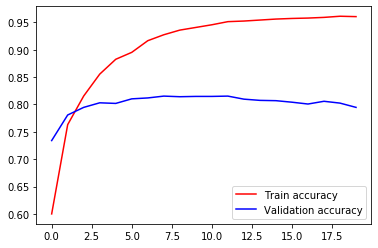

In [17]:
plt.plot(np.arange(epochs),acc,color='red',label='Train accuracy')
plt.plot(np.arange(epochs),val_acc,color='blue',label='Validation accuracy')
plt.legend()
plt.show()